<a href="https://colab.research.google.com/github/fhcwong/SICSS-Lingnan/blob/main/sicss_unsup5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enable GPUs for the notebook:
Edit→Notebook Settings→Select GPU

Install packages

In [3]:
!pip install bertopic
!pip install tensorflow_text
import os
os.environ['TF_USE_LEGACY_KERAS']='1'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# **Restart runtime if encounted error**

Load the packages needed

In [1]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text

from google.colab import drive
from google.colab import files

Mount Google Drive

Make sure to allow access

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data from Google Drive

*Find the file path from your own Google Drive

In [3]:
df = pd.read_excel('/content/drive/My Drive/SICSS_Lingnan2025/demo_rss_world_news_jan2025.xlsx')

In [4]:
df.head(5)

,date,source,url,title,text
0,2025-01-01,The Guardian,https://www.theguardian.com/world/2025/jan/01/...,Critic wrongly jailed by former president of P...,"Leila de Lima, one of fiercest critics of the ..."
1,2025-01-01,The Guardian,https://www.theguardian.com/us-news/2025/jan/0...,Trump’s killing of Qassem Suleimani led to fal...,Donald Trump’s decision to sanction the assass...
2,2025-01-01,The Guardian,https://www.theguardian.com/world/2025/jan/01/...,Belgium becomes first EU country to ban sale o...,Belgium has become the EU first country to ban...
3,2025-01-01,The Guardian,https://www.theguardian.com/world/2025/jan/01/...,Fate of endangered monkey hinges on Brazilian ...,The fate of one of the world’s most threatened...
4,2025-01-01,The Guardian,https://www.theguardian.com/world/2025/jan/01/...,Russian gas flows to Europe via Ukraine cease ...,Russian gas has ceased flowing to Europe via U...


Convert the text into a tensor-like object

In [4]:
text_tf = tf.constant(df['text'][0:100])

Instead of training an embedding model, we can explore the pretrained models online. For example, Kaggle provides a depository for models

List of models for text pre-processing:
https://www.kaggle.com/models?task=16714&owner-type=organization

For example, we can use BERT model in the Keras functional API

https://www.kaggle.com/models/tensorflow/bert/tensorFlow2/bert-en-uncased-l-6-h-256-a-4

In [5]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2",
    trainable=True)



For example, we can find the embeddings for "Make this sentence into vectors"

In [6]:
#embedding_model = tf.keras.Model(text_input, pooled_output)
sentence = tf.constant(["Make this sentence into vectors"])
sentence_embed = encoder(preprocessor(sentence))["pooled_output"]
print(sentence_embed)

tf.Tensor(
[[-0.62672585  0.9620021   0.03935843 -0.95506614 -0.98450845 -0.6791088
  -0.95548594  0.14333627  0.64971274 -0.9748542  -0.8923979   0.7454475
   0.8846625   0.9736982   0.09690014  0.98191965 -0.99315023 -0.4605114
  -0.9448723   0.9907538  -0.944603   -0.01719878  0.05280051  0.9724909
  -0.92091936  0.97014797  0.13591373 -0.9994648  -0.71242696 -0.9630923
   0.97352874  0.9315892   0.9896672   0.9602094   0.9566841  -0.04679194
  -0.9932925  -0.84754705 -0.05712041  0.68875325 -0.9095516  -0.68995726
   0.14455558  0.99764764 -0.825352   -0.7380243  -0.04684411  0.3714678
   0.8267558   0.99067163 -0.8375402  -0.8136143   0.24430043  0.12626304
  -0.01000875 -0.8969129   0.12025696  0.285018   -0.9840701   0.9637966
  -0.9840983  -0.10829997 -0.35036415 -0.01929475 -0.5490811   0.94638187
   0.00755344 -0.9748416   0.07469372 -0.52761024 -0.9970013   0.01104752
  -0.8709493  -0.08262201  0.9990708  -0.22895198 -0.01273738  0.06284645
   0.2013466   0.0609966   0.79975

Or we can obtain the embeddings from our dataset (with "text_tf" object)

In [7]:
text_embed = encoder(preprocessor(text_tf))["pooled_output"]
print(text_embed)

tf.Tensor(
[[-0.93574715  0.91673183  0.05169323 ...  0.94370234 -0.29014462
   0.06279928]
 [-0.5876578   0.9294758  -0.03365749 ...  0.94230044 -0.3923347
   0.11958073]
 [-0.6543724   0.9608294  -0.03212234 ...  0.95095414 -0.29265282
   0.15681857]
 ...
 [-0.72228926  0.9588855  -0.05930482 ...  0.9937812  -0.70787466
   0.07670332]
 [ 0.45934528  0.938713   -0.00282844 ...  0.9695306  -0.57990134
   0.01850264]
 [ 0.12866378  0.9936111   0.10491081 ...  0.9940098  -0.84052956
  -0.04543476]], shape=(100, 128), dtype=float32)


The embeddings can be used for NLP tasks such as classification or topic modeling

Below are some of the implimentations of word embeddings for topic modeling

**BERTopic** can generate topics automatically leveraging the power of BERT. See the examplation of the algorithm below

https://maartengr.github.io/BERTopic/algorithm/algorithm.html

More on BERTopic
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-#scrollTo=IVpvT4bA6KiN

First, extract the text series

*no (pre)cleaning needed

In [4]:
docs = df['text'][0:500]

Next, fit the BERT model

Choose model from the list and plug into "embedding_model"


https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [ ]:
from bertopic import BERTopic

In [23]:
BERT_model = BERTopic(language="english", embedding_model= "all-MiniLM-L6-v2", calculate_probabilities=True, verbose=True)
topics, probs = BERT_model.fit_transform(docs)

2025-06-16 03:43:27,380 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-06-16 03:43:29,159 - BERTopic - Embedding - Completed ✓
2025-06-16 03:43:29,161 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-16 03:43:30,019 - BERTopic - Dimensionality - Completed ✓
2025-06-16 03:43:30,020 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-16 03:43:30,112 - BERTopic - Cluster - Completed ✓
2025-06-16 03:43:30,116 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-16 03:43:30,187 - BERTopic - Representation - Completed ✓


Explore the topics

*Topic "-1" is unclassified

Number of topics (max + 1 because the first topic is "0")

In [12]:
max(topics)+1

18

In [13]:
freq = BERT_model.get_topic_info()
freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,56,-1_he_china_and_in,"[he, china, and, in, his, on, the, of, to, was]",[Dominique Pelicot's lawyer said he would not ...
1,0,58,0_the_to_and_of,"[the, to, and, of, in, said, on, that, at, as]",[Investigators in South Korea have extracted d...
2,1,48,1_the_of_year_in,"[the, of, year, in, and, to, new, you, for, is]",[What economic challenges does the world have ...
3,2,38,2_prize_and_depression_nobel,"[prize, and, depression, nobel, research, awar...","[David Baker, Demis Hassabis and John M. Jumpe..."
4,3,31,3_the_of_and_in,"[the, of, and, in, to, waste, ban, people, smo...",[Belgium has become the EU first country to ba...


Optional: topic reduction

In [24]:
BERT_model.reduce_topics(docs, nr_topics=10)#"auto")
topics = BERT_model.topics_

2025-06-16 03:43:39,452 - BERTopic - Topic reduction - Reducing number of topics
2025-06-16 03:43:39,464 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-16 03:43:39,516 - BERTopic - Representation - Completed ✓
2025-06-16 03:43:39,517 - BERTopic - Topic reduction - Reduced number of topics from 21 to 10


In [25]:
max(topics)+1

9

In [27]:
freq = BERT_model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,76,-1_the_in_and_to,"[the, in, and, to, on, of, he, was, china, his]",[Twenty people are missing after falling into ...
1,0,134,0_the_of_in_to,"[the, of, in, to, and, year, for, new, is, will]",[The upcoming year looks set to be a big one i...
2,1,91,1_the_in_of_and,"[the, in, of, and, to, on, that, for, is, said]",[Israeli airstrikes killed at least 43 Palesti...
3,2,63,2_her_she_the_and,"[her, she, the, and, to, was, in, with, keleti...",[Five-time Olympic gold medalist in gymnastics...
4,3,36,3_the_to_of_and,"[the, to, of, and, gas, ukraine, in, russian, ...",[Russian gas has ceased flowing to Europe via ...
5,4,25,4_the_to_in_andhra,"[the, to, in, andhra, of, will, corporation, p...",[State government will extend financial assist...
6,5,24,5_the_of_to_and,"[the, of, to, and, they, waste, in, are, is, s...",[The fate of one of the world’s most threatene...
7,6,22,6_de_le_la_des,"[de, le, la, des, en, du, et, les, son, une]","[Le pays avait déjà enregistré, en 2024, les m..."
8,7,15,7_christmas_chocolate_items_are,"[christmas, chocolate, items, are, santa, clau...","[The skyrocketing price of chocolate, due to a..."
9,8,14,8_flu_h5n1_spread_vaccine,"[flu, h5n1, spread, vaccine, vaccines, bird, 1...",[Nations are buying H5N1 bird flu vaccines as ...


Optional: handeling stopwords

Remove stopwords only after embeddings. Why?

https://maartengr.github.io/BERTopic/faq.html#how-do-i-reduce-topic-outliers

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer_model = CountVectorizer(stop_words="english")
BERT_model = BERTopic(vectorizer_model=vectorizer_model, language="english", embedding_model= "all-MiniLM-L6-v2", calculate_probabilities=True, verbose=True)
topics, probs = BERT_model.fit_transform(docs)

2025-06-16 03:50:55,122 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-06-16 03:50:56,989 - BERTopic - Embedding - Completed ✓
2025-06-16 03:50:56,990 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-16 03:50:57,809 - BERTopic - Dimensionality - Completed ✓
2025-06-16 03:50:57,810 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-16 03:50:57,849 - BERTopic - Cluster - Completed ✓
2025-06-16 03:50:57,852 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-16 03:50:57,918 - BERTopic - Representation - Completed ✓


In [32]:
max(topics)+1

17

In [33]:
freq = BERT_model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,68,-1_sala_said_iran_h5n1,"[sala, said, iran, h5n1, flu, prison, iranian,...",[Italian Prime Minister Giorgia Meloni said sh...
1,0,57,0_said_people_police_china,"[said, people, police, china, new, orleans, so...",[Police in South Korea have raided Muan intern...
2,1,41,1_year_new_2025_fireworks,"[year, new, 2025, fireworks, midnight, london,...",[What economic challenges does the world have ...
3,2,41,2_prize_depression_nobel_research,"[prize, depression, nobel, research, award, dw...","[David Baker, Demis Hassabis and John M. Jumpe..."
4,3,31,3_keleti_wildenstein_olympic_died,"[keleti, wildenstein, olympic, died, gymnastic...",[Five-time Olympic gold medalist in gymnastics...
5,4,29,4_germany_brussels_eu_2025,"[germany, brussels, eu, 2025, alliance, challe...",[Germany's largest steel company plans to cut ...
6,5,26,5_andhra_corporation_pradesh_forest,"[andhra, corporation, pradesh, forest, state, ...",[State government will extend financial assist...
7,6,25,6_waste_ban_smoking_people,"[waste, ban, smoking, people, bhopal, chemical...",[Belgium has become the EU first country to ba...
8,7,24,7_gas_ukraine_russia_russian,"[gas, ukraine, russia, russian, transit, energ...",[Russia launched a New Year’s Day drone strike...
9,8,24,8_syria_assad_cultural_regime,"[syria, assad, cultural, regime, naples, tugen...",[Syria's cultural scene is in ruins following ...


In [28]:
BERT_model.get_topic(0) # Read the documentation for other attributes

[('the', np.float64(0.06141626437734476)),
 ('of', np.float64(0.04765737058835975)),
 ('in', np.float64(0.04475449426666225)),
 ('to', np.float64(0.040040420432965816)),
 ('and', np.float64(0.040022426356012865)),
 ('year', np.float64(0.03284030148080905)),
 ('for', np.float64(0.028553669529593914)),
 ('new', np.float64(0.02690972902801371)),
 ('is', np.float64(0.025035221256012968)),
 ('will', np.float64(0.024099371725994117))]

In [34]:
BERT_model.visualize_hierarchy()

Identify top words

In [35]:
BERT_model.visualize_barchart(top_n_topics=10)

More on FASTopic

https://huggingface.co/blog/bobxwu/fastopic

https://colab.research.google.com/drive/1bduHWL5_bvsl4EYOgimCOmU-7RfnXqrX?usp=sharing

Install the package

In [36]:
!pip install fastopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy

**If runtime is restarted, packages and datasets from the previous steps should be reloaded.**

In [1]:
from fastopic import FASTopic

Train the FASTopic model

In [7]:
FAST_model = FASTopic(num_topics=50, verbose=True)
topic_top_words, doc_topic_dist = FAST_model.fit_transform(docs)

2025-06-16 03:57:09,254 - FASTopic - use device: cuda
2025-06-16 03:57:09,255 - FASTopic - First fit the model.
parsing texts: 100%|██████████| 500/500 [00:00<00:00, 14882.81it/s]
2025-06-16 03:57:13,260 - TopMost - Real vocab size: 6480
2025-06-16 03:57:13,261 - TopMost - Real training size: 500 	 avg length: 42.238


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Training FASTopic: 100%|██████████| 200/200 [00:12<00:00, 16.07it/s]


Topic 0: gas transit waste ukraine russian russia zelenskyy ukrainian moldova bhopal moscow stopped kyiv energy toxic
Topic 1: kugelbomben firework suffered demanded bombs spherical firecrackers poland compared cities czech rotterdam outlawed pyrotechnics unexpectedly
Topic 2: mens fifas nations bloc arabia broadcast draw join indo pacfic stage expansion slap monarchys havoc
Topic 3: alliance brussels battered reopen ruhin footballers recognition neighboring mariam teammates riches strengthen sisters orban conquering
Topic 4: googles conventional cent increase threatens delay trumps changes targets warned powerful tipping slash worsening deforestation
Topic 5: italian search decade cultural remains started sea ships incident phone activists boat left organisation close
Topic 6: crash flight landing aircraft airport plane aviation recorder gear safety south muan barrier korea data
Topic 7: smoking sale chocolate cigarettes nicotine price vapes tobacco inflation sales ban survey availabl

Examine the results

In [8]:
FAST_model.get_topic(1)

(('kugelbomben', 0.009652257),
 ('firework', 0.00935685),
 ('suffered', 0.0074873925),
 ('demanded', 0.007459533),
 ('bombs', 0.0074339304))

Visualize the topwords

In [9]:
fig = FAST_model.visualize_topic(top_n=10)
fig.show()

Show topic hierarchy

In [10]:
fig = FAST_model.visualize_topic_hierarchy()
fig.show()

More on top2vec

https://github.com/ddangelov/Top2Vec

https://colab.research.google.com/drive/1T88YY-c2t37z73E_Qo_u1NBvyjy3kEim?usp=sharing

For the choice of embedding models:

https://top2vec.readthedocs.io/en/stable/api.html#

In [7]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
!pip install top2vec  # easy way to install Top2Vec
#!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-wkts5se8/hdbscan_4f03e734f0ec45c492126c3a8d55890b
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-wkts5se8/hdbscan_4f03e734f0ec45c492126c3a8d55890b
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit 8ecf239379c75343b8e1350d62ca8e0a73259f9b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0


**If runtime is restarted, packages and datasets from the previous steps should be reloaded.**

In [8]:
from top2vec import Top2Vec

In [10]:
docs = docs.tolist()

In [11]:
top2vec_model = Top2Vec(documents=docs, embedding_model='distiluse-base-multilingual-cased')

2025-06-16 04:01:19,594 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-06-16 04:01:19,991 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2025-06-16 04:01:36,647 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-06-16 04:01:37,774 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-06-16 04:01:47,858 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-06

In [12]:
top2vec_model.get_num_topics()

7

In [13]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(topic_sizes)

[157  84  72  59  49  48  31]


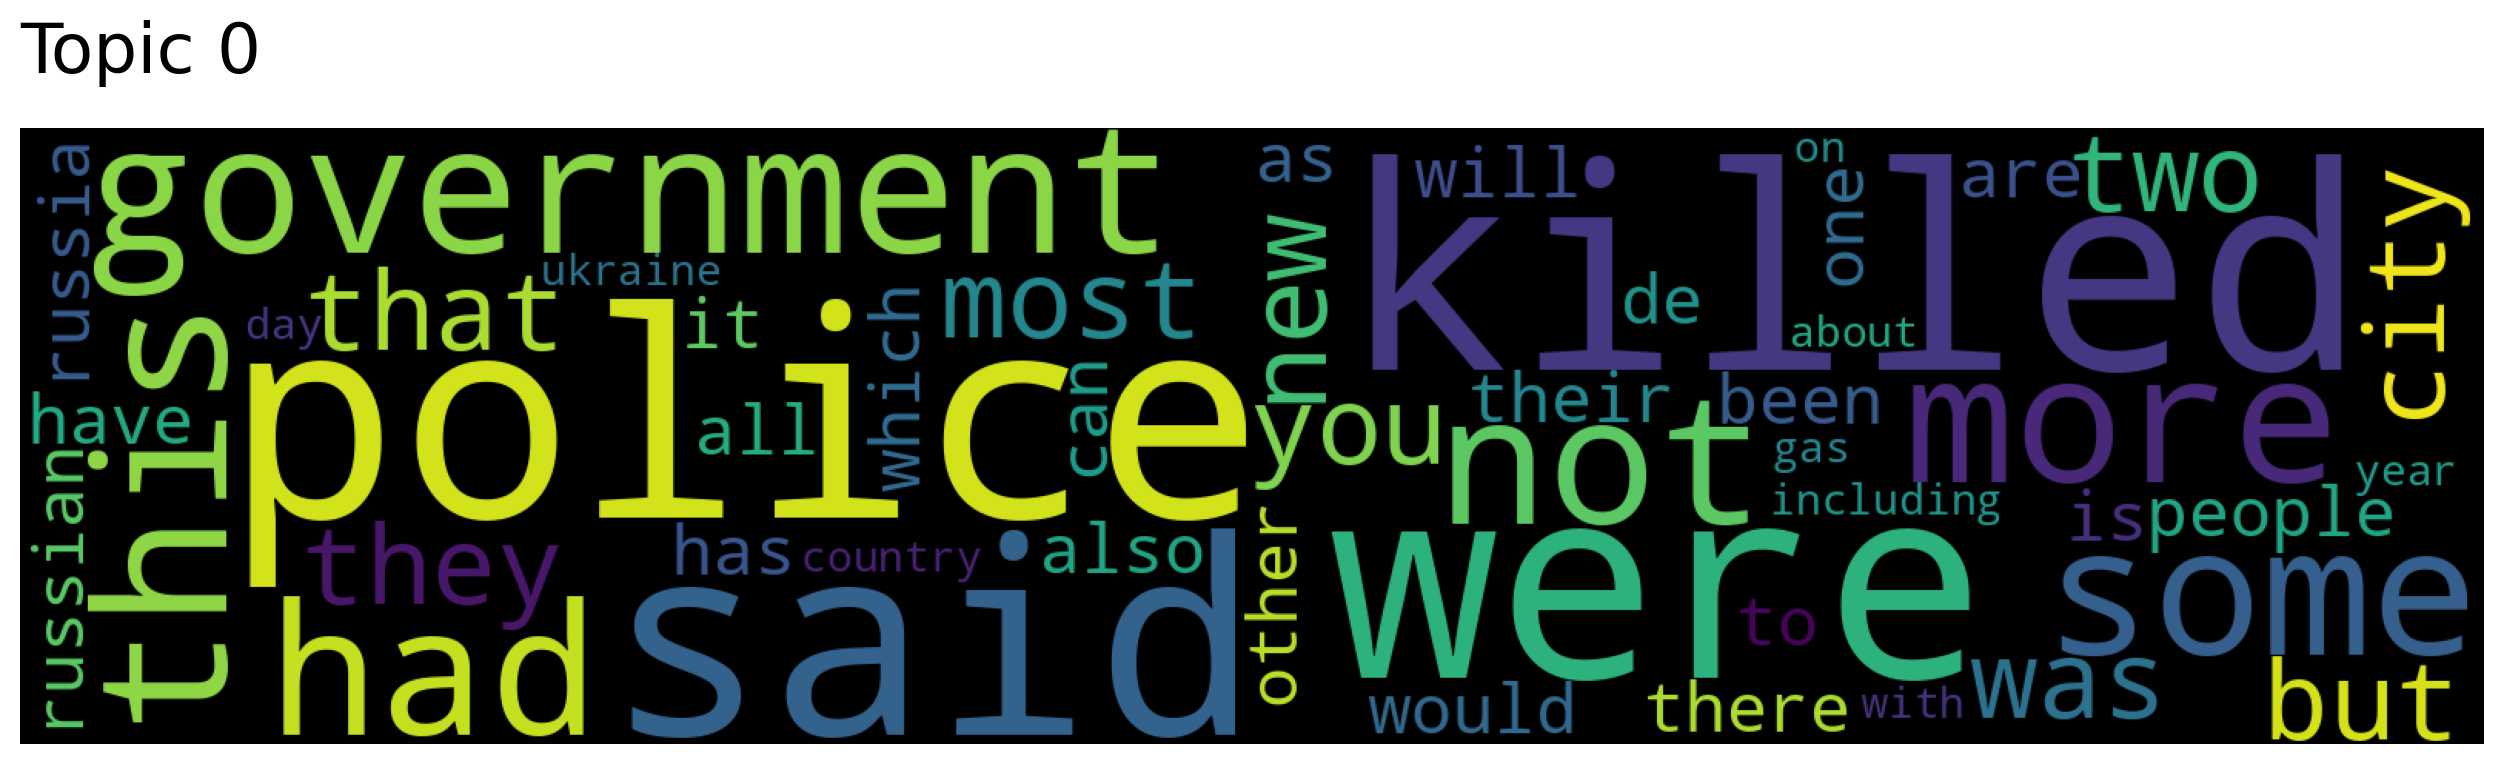

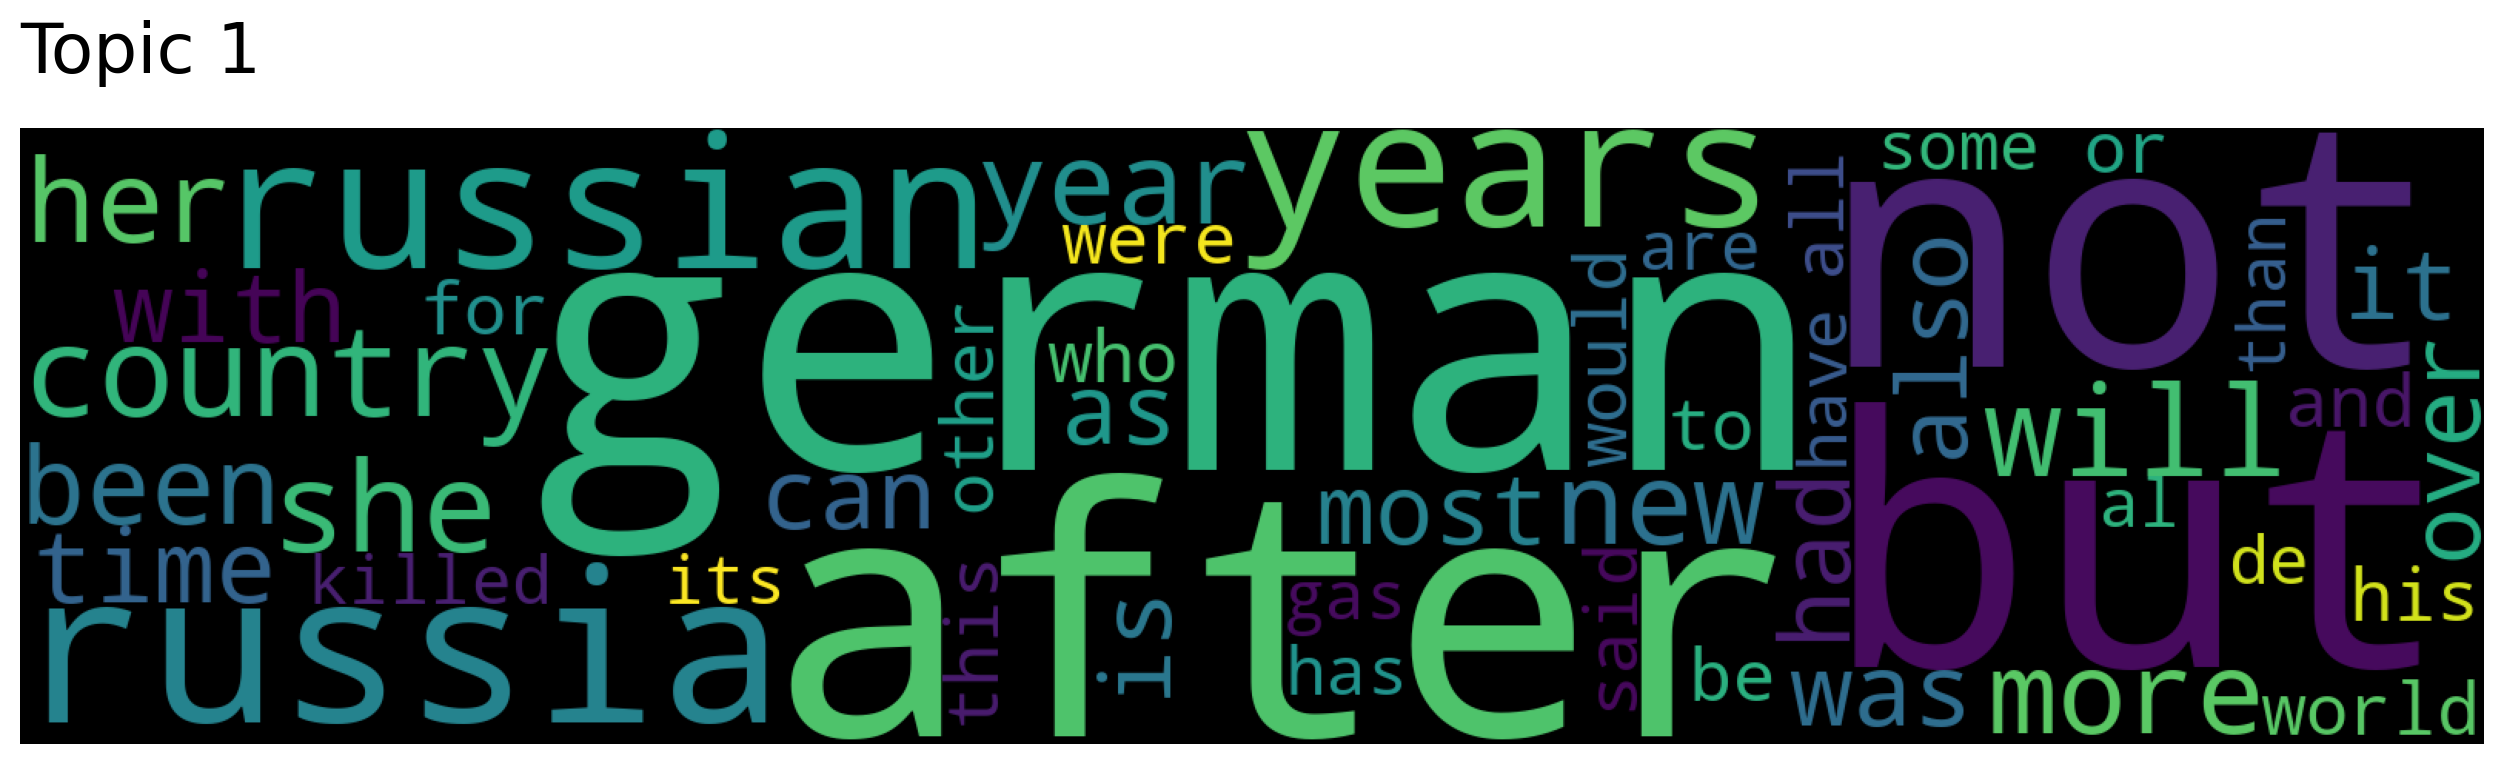

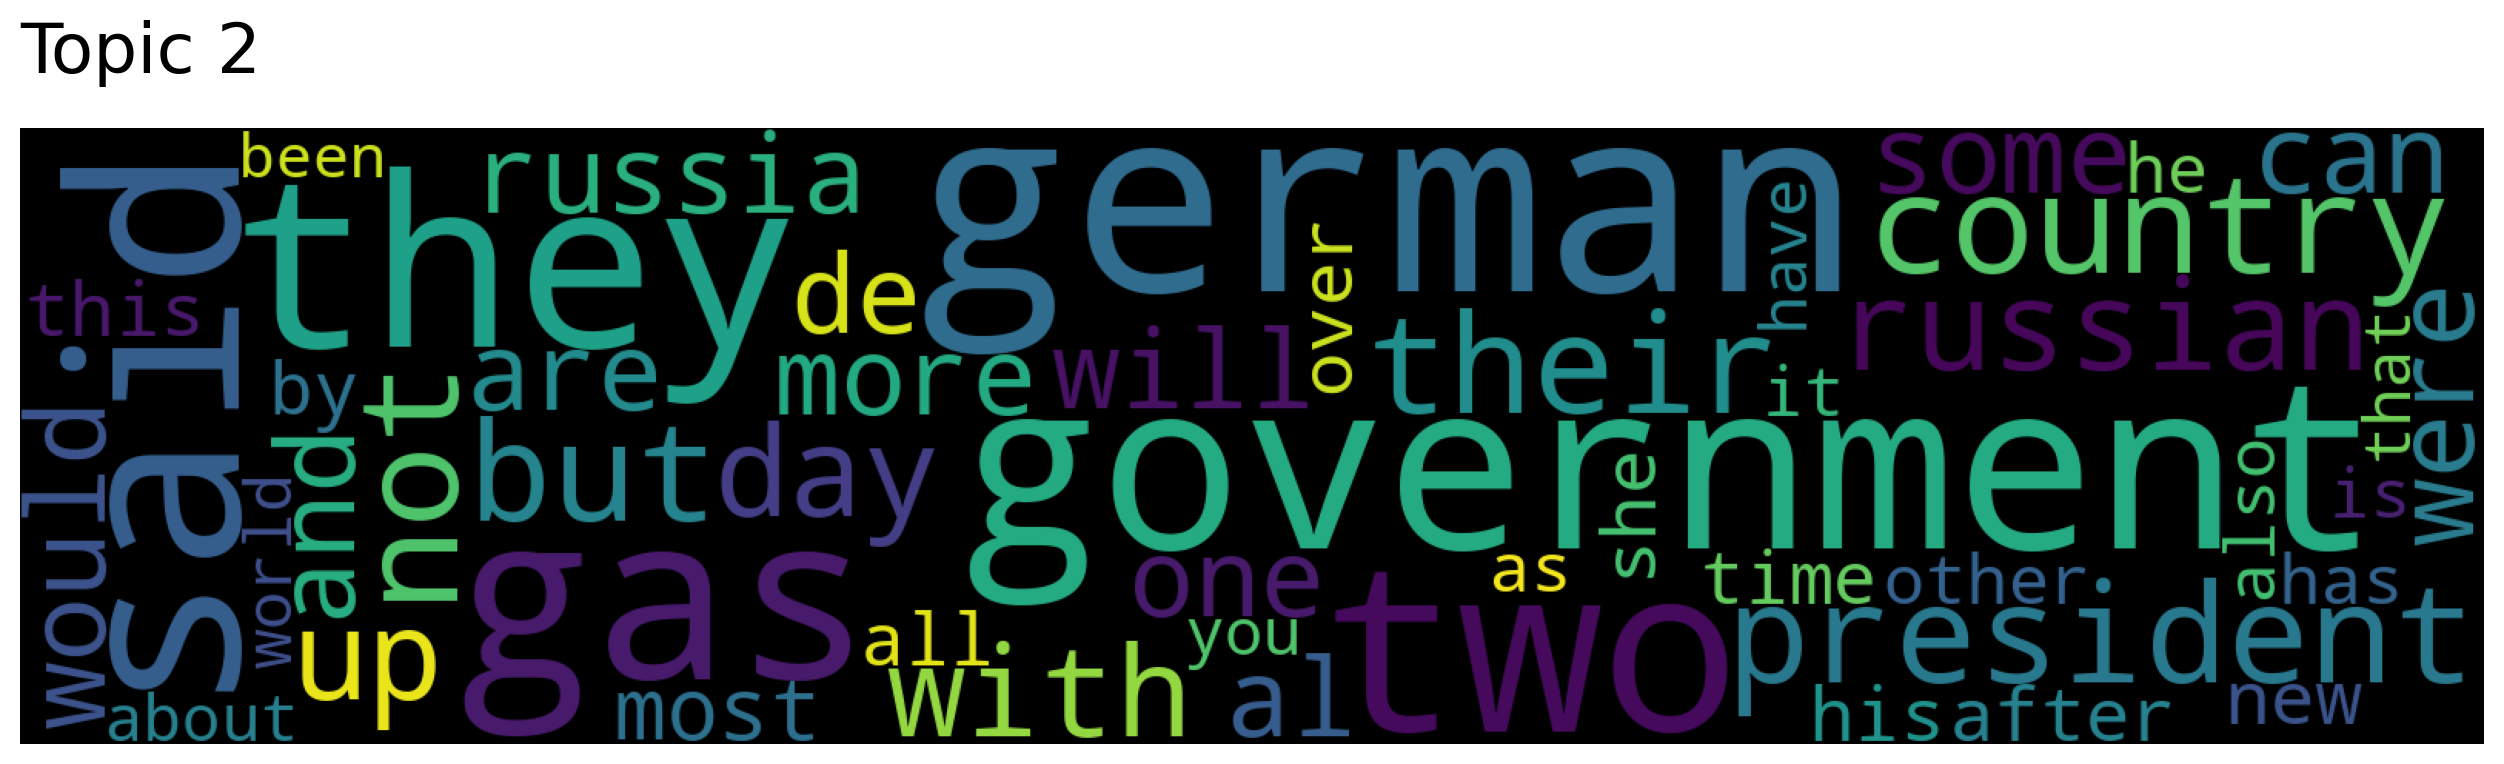

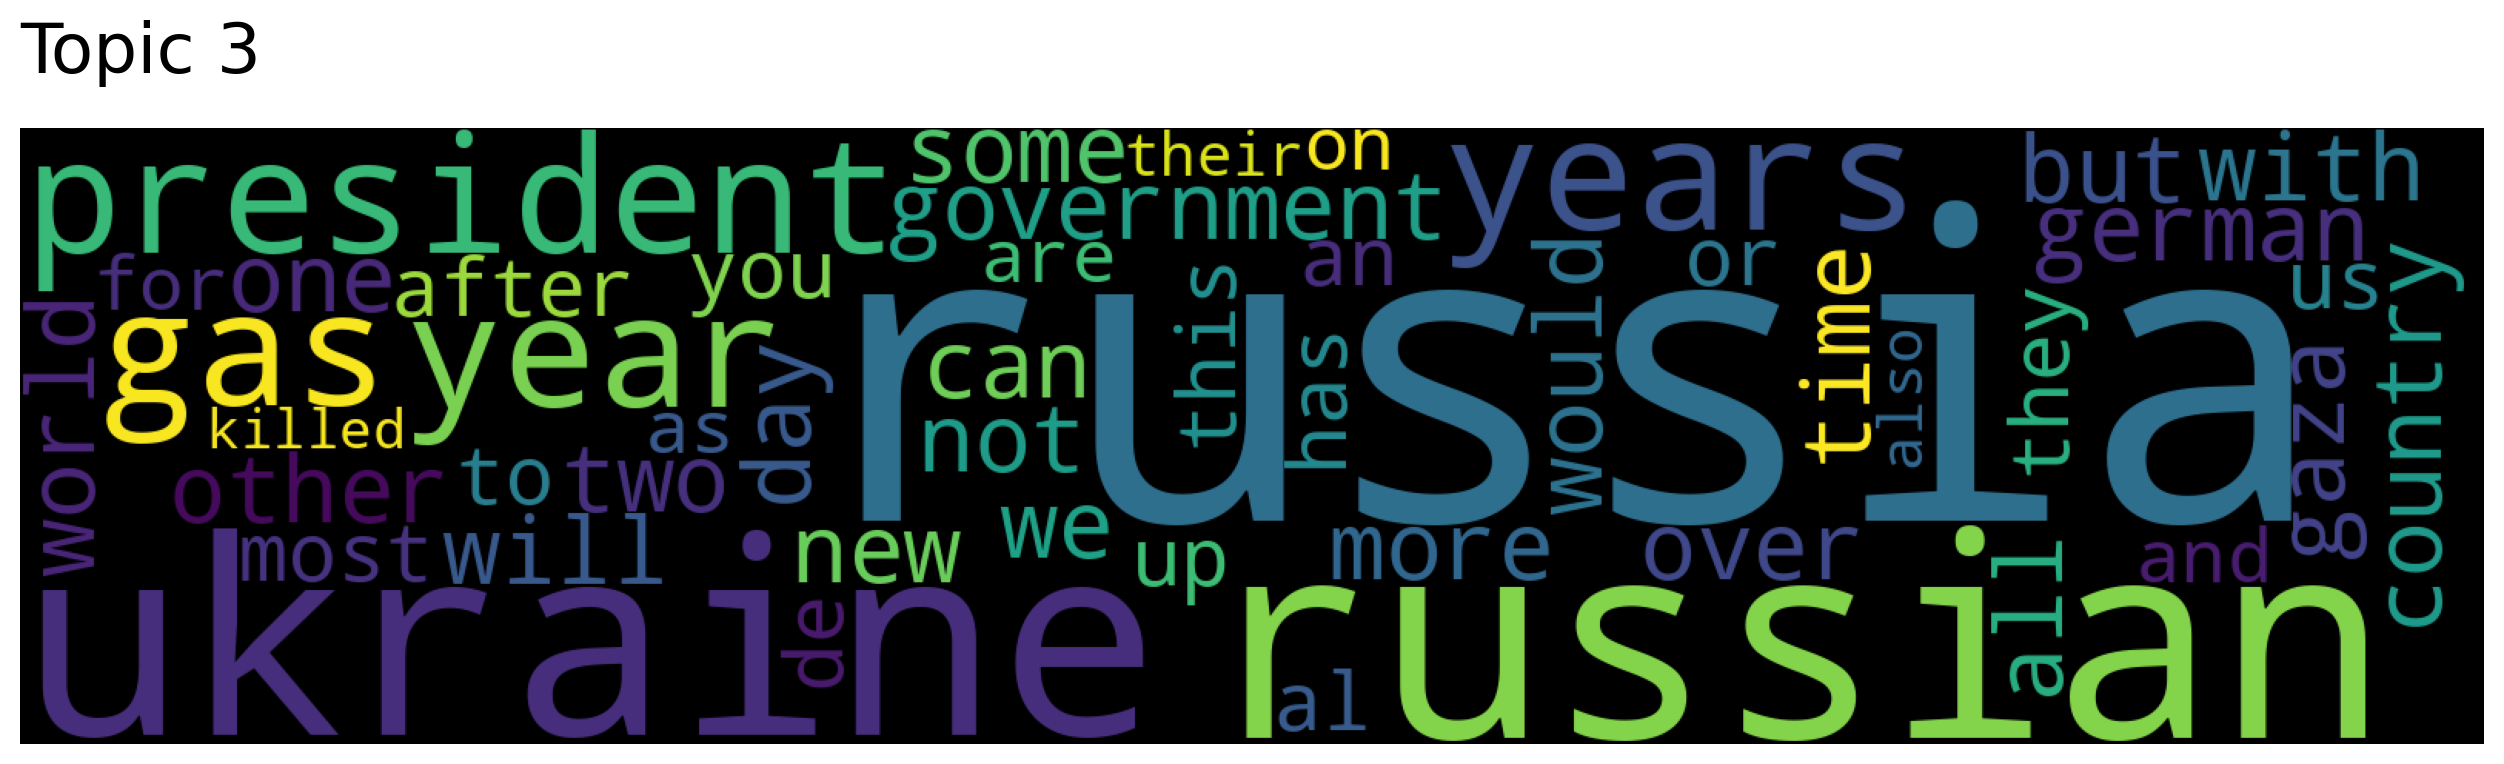

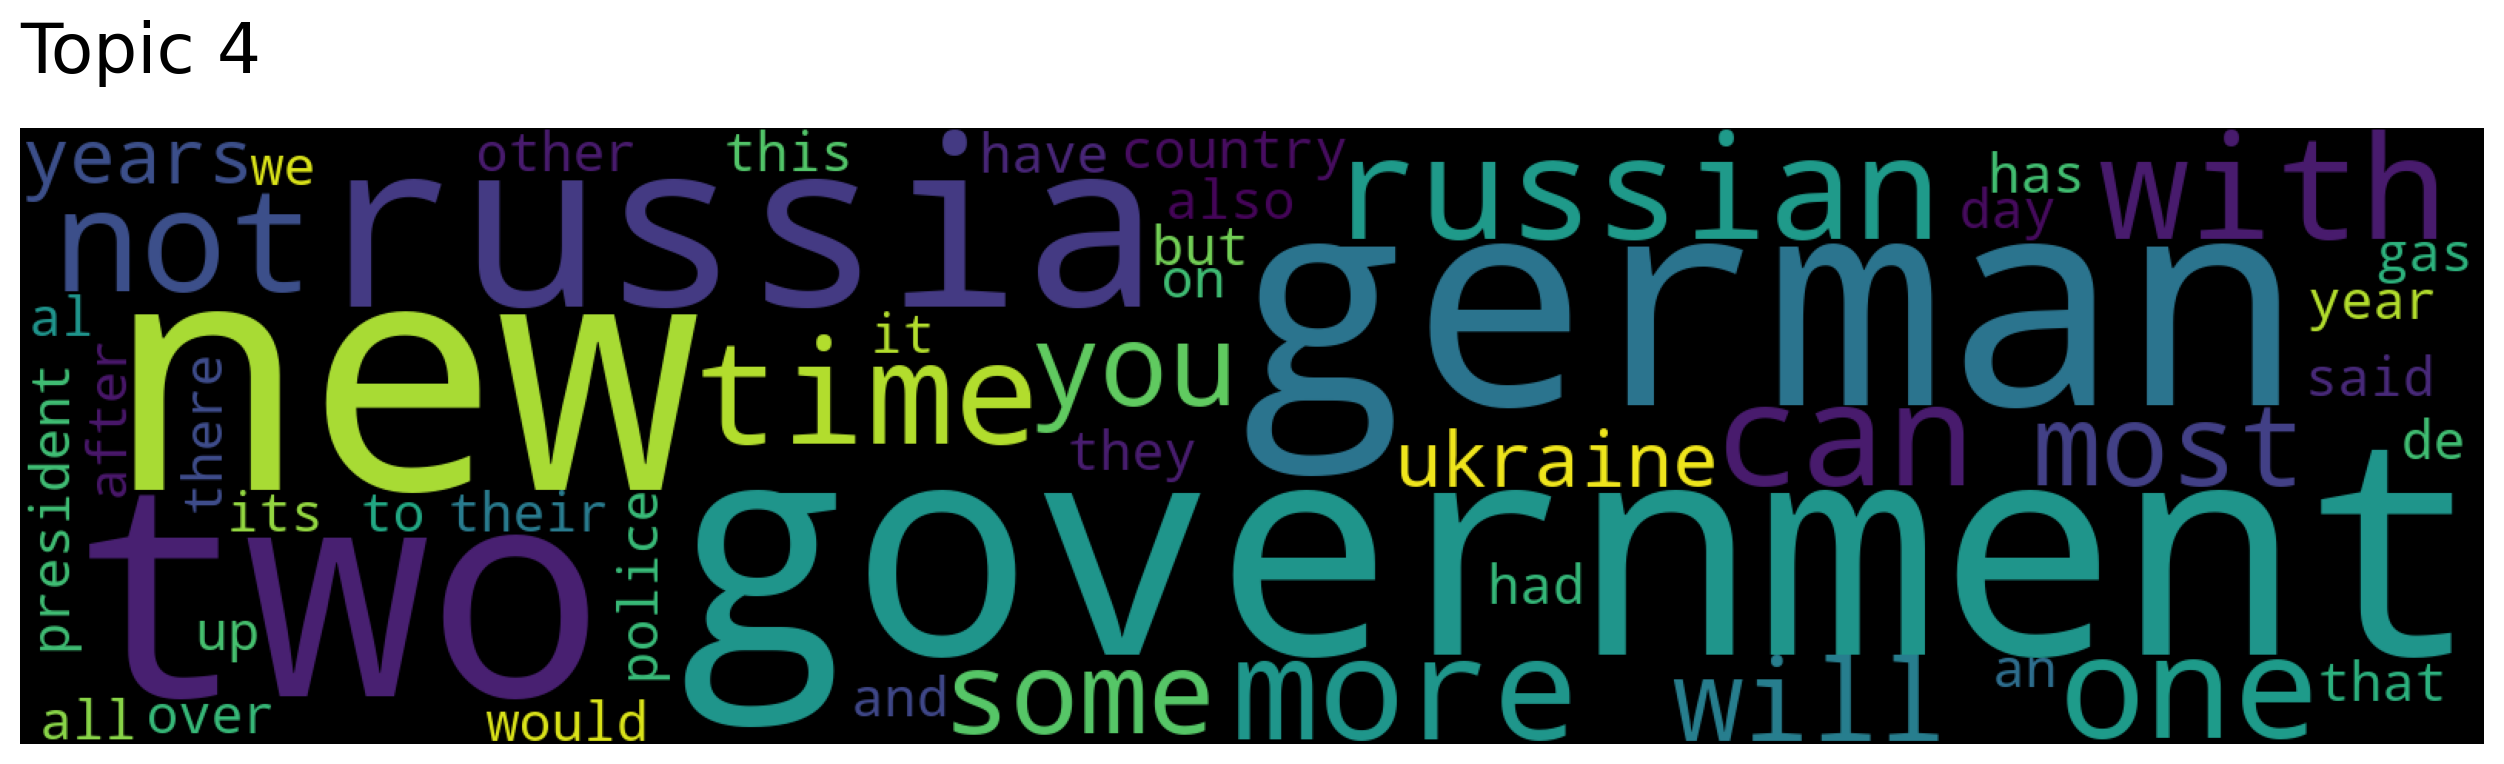

In [14]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics(top2vec_model.get_num_topics())
for topic in topic_nums[:5]:
    top2vec_model.generate_topic_wordcloud(topic)

In [15]:
top2vec_model.hierarchical_topic_reduction(4)
top2vec_model.get_topic_hierarchy()

Reducing topics: 100%|██████████| 3/3 [00:00<00:00, 203.71it/s]


[[0], [4, 5, 6, 2], [1], [3]]

Contextual Top2Vec

In [17]:
# Create a Contextual Top2Vec model
top2vec_model = Top2Vec(documents=docs,
                        ngram_vocab=True,
                        contextual_top2vec=True)

2025-06-16 04:02:20,469 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-06-16 04:02:21,082 - top2vec - INFO - Creating vocabulary embedding
INFO:top2vec:Creating vocabulary embedding
Embedding vocabulary: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
2025-06-16 04:02:22,804 - top2vec - INFO - Create contextualized document embeddings
INFO:top2vec:Create contextualized document embeddings
Embedding documents: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s]
500it [00:00, 15445.33it/s]
2025-06-16 04:02:28,730 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite'